# Data Science II - Data Understanding
## by Hakan Köse and Maik Wydra

This notebook is the documentation of the seminar work in the data science II module. 

### Task: Do a Classification about the RKI Covid19 dataset.

In [1]:
# Imports for the notebook
# General imports
import pandas as pd

# Visualization frameworks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

### Import and loading the data into a dataframe

In [2]:
# Importing with standard date formats
covid19 = pd.read_csv("./data/rki_covid19_19_10_2020.csv", parse_dates=["Meldedatum", "Refdatum"], dayfirst=True)

# Parsing own non-standard date format
covid19["Datenstand"] = pd.to_datetime(covid19["Datenstand"], format="%d.%m.%Y, %H:%M Uhr", errors="ignore")
covid19.head(5)

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,45167592,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,2020-10-19,0,-9,2020-09-30,0,1,0,Nicht übermittelt
1,45167593,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-08-24,1001,2020-10-19,0,-9,2020-08-24,0,1,0,Nicht übermittelt
2,45167594,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-26,0,1,0,Nicht übermittelt
3,45167595,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-25,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt
4,45167596,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt


### Looking into the daily reported cases about the complete corona crises

Text(0, 0.5, 'Count of cases')

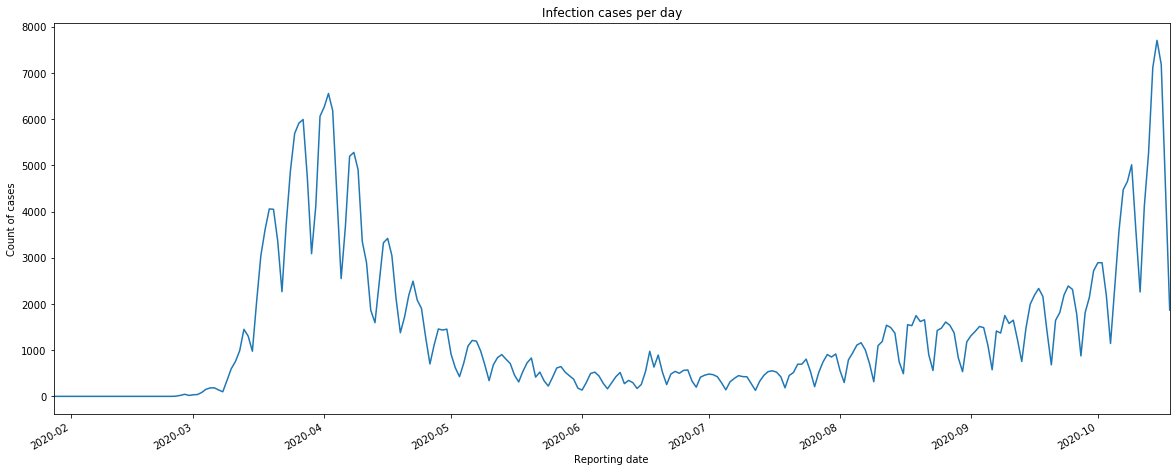

In [28]:
# Showing infections per day about the timeline
covid19_time = covid19[["Bundesland", "Meldedatum", "NeuerFall", "AnzahlFall"]]

# Letting all -1 cases out
covid19_time = covid19_time[covid19_time["NeuerFall"] != -1]

# Plotting the line
covid19_time.groupby(covid19_time["Meldedatum"]).sum()["AnzahlFall"].plot(linestyle='-', figsize=(20, 8))

plt.title("Infection cases per day")
plt.xlabel("Reporting date")
plt.ylabel("Count of cases")

Text(0, 0.5, 'Count of deaths')

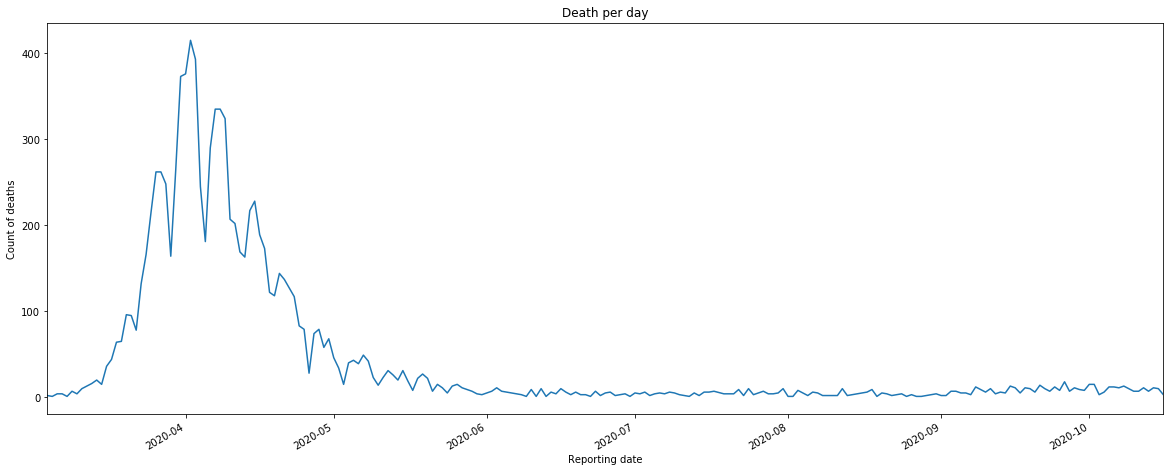

In [31]:
# Showing deaths per day about the timeline

covid19_time = covid19[["Bundesland", "Meldedatum", "NeuerTodesfall", "AnzahlTodesfall"]]

# Letting all -1 cases out
covid19_time = covid19_time[(covid19_time["NeuerTodesfall"] != -1) & (covid19_time["NeuerTodesfall"] != -9)]

# Plotting the line
covid19_time.groupby(covid19_time["Meldedatum"]).sum()["AnzahlTodesfall"].plot(linestyle='-', figsize=(20, 8))
plt.title("Death per day")
plt.xlabel("Reporting date")
plt.ylabel("Count of deaths")

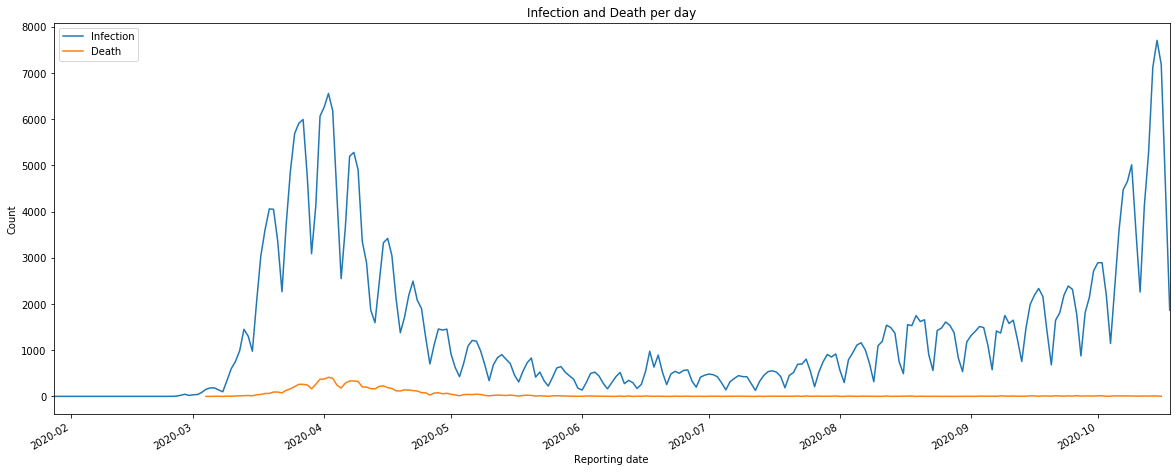

In [32]:
# Both Infection and Death per Day
covid19_time = covid19[["Bundesland", "Meldedatum", "NeuerFall", "AnzahlFall"]]

# Letting all -1 cases out
covid19_time = covid19_time[covid19_time["NeuerFall"] != -1]

# Plotting the line
covid19_time.groupby(covid19_time["Meldedatum"]).sum()["AnzahlFall"].plot(linestyle='-', figsize=(20,8))

covid19_time = covid19[["Bundesland", "Meldedatum", "NeuerTodesfall", "AnzahlTodesfall"]]

# Letting all -1 cases out
covid19_time = covid19_time[(covid19_time["NeuerTodesfall"] != -1) & (covid19_time["NeuerTodesfall"] != -9)]

# Plotting the line
covid19_time.groupby(covid19_time["Meldedatum"]).sum()["AnzahlTodesfall"].plot(linestyle='-')

plt.title("Infection and Death per day")
plt.xlabel("Reporting date")
plt.ylabel("Count")
plt.legend(["Infection", "Death"])

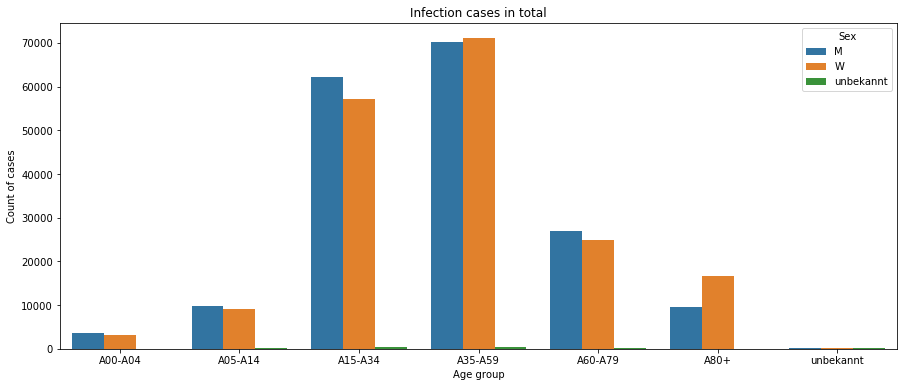

In [38]:
# Showing infections in total for age group and sex

covid19_time = covid19[["Bundesland", "Geschlecht","Altersgruppe","NeuerFall", "AnzahlFall"]]

# Letting all -1 cases out
covid19_time = covid19_time[covid19_time["NeuerFall"] != -1]

# Plotting the line
plt.figure(figsize=(15,6))
sns.barplot(data=covid19_time.groupby(["Altersgruppe", "Geschlecht"]).sum().reset_index(["Altersgruppe","Geschlecht"]), x="Altersgruppe", y="AnzahlFall", hue="Geschlecht")

plt.title("Infection cases in total")
plt.xlabel("Age group")
plt.ylabel("Count of cases")
plt.legend(title="Sex")

Text(0, 0.5, 'Count of cases')

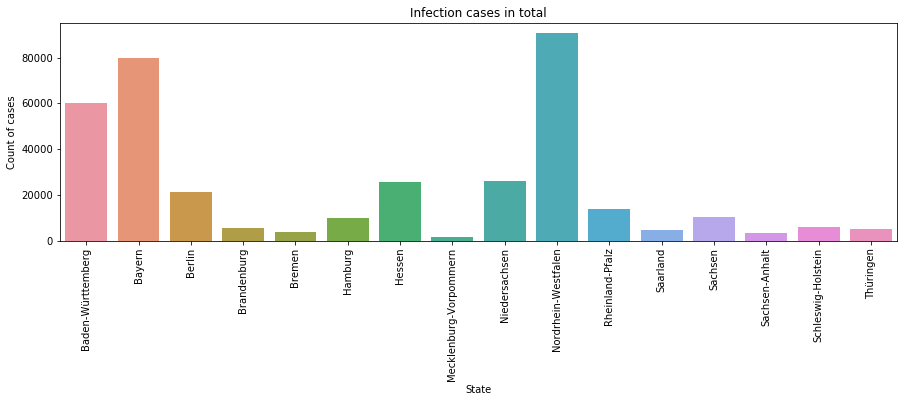

In [40]:
# Showing infections in total for states

covid19_time = covid19[["Bundesland","NeuerFall", "AnzahlFall"]]

# Letting all -1 cases out
covid19_time = covid19_time[covid19_time["NeuerFall"] != -1]

# Plotting the line
plt.figure(figsize=(15,4))
sns.barplot(data=covid19_time.groupby("Bundesland").sum().reset_index(["Bundesland"]), x="Bundesland", y="AnzahlFall")

plt.title("Infection cases in total")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Count of cases")

Text(0, 0.5, 'Count of deaths')

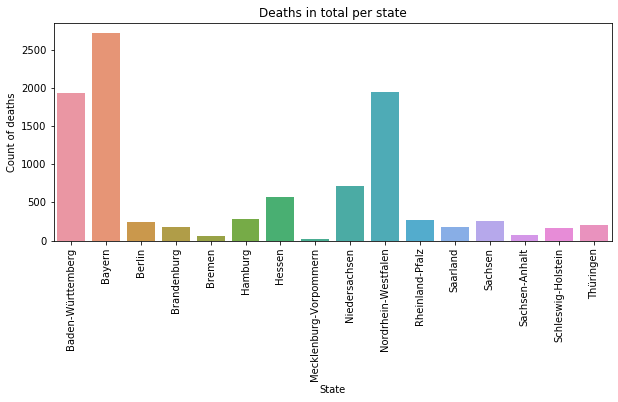

In [43]:
# Showing deaths in total for states

covid19_time = covid19[["Bundesland","NeuerTodesfall", "AnzahlTodesfall"]]

# Letting all -1 cases out
covid19_time = covid19_time[(covid19_time["NeuerTodesfall"] != -1) & (covid19_time["NeuerTodesfall"] != -9)]

# Plotting the line
plt.figure(figsize=(10,4))
sns.barplot(data=covid19_time.groupby("Bundesland").sum().reset_index(["Bundesland"]), x="Bundesland", y="AnzahlTodesfall")

plt.title("Deaths in total per state")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Count of deaths")

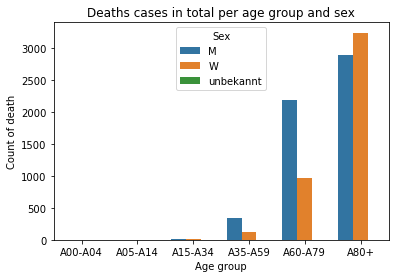

In [44]:
# Showing deaths in total for age group and sex

covid19_time = covid19[["Altersgruppe", "Geschlecht", "NeuerTodesfall", "AnzahlTodesfall"]]

# Letting all -1 cases out
covid19_time = covid19_time[(covid19_time["NeuerTodesfall"] != -1) & (covid19_time["NeuerTodesfall"] != -9)]

# Plotting the line
sns.barplot(data=covid19_time.groupby(["Altersgruppe", "Geschlecht"]).sum().reset_index(["Altersgruppe","Geschlecht"]), x="Altersgruppe", y="AnzahlTodesfall", hue="Geschlecht")

plt.title("Deaths cases in total per age group and sex")
plt.xlabel("Age group")
plt.ylabel("Count of death")
plt.legend(title="Sex")